In [1]:
# Importando bibliotecas
from pandas import read_csv 
import pandas as pd #manejo y estructuracion de datos y su manipulación
from pandas.plotting import scatter_matrix #diagramas de correlacción
from matplotlib import pyplot #Hacer gráficos en python
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada 
#modelos que vamos a evaluar
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC #Maquinas vectoriales


#PASO 2. LEER EL DATASET

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" #carga los datos desde una web
names = ['Largo-Sépalo', 'Ancho-Sépalo', 'Largo-Pétalo', 'Ancho-Pétalo', 'clase'] #nombre de las columnas
dataset = read_csv(url, names=names) #leer el data set

#PASO 3. CONOCERLO Y RESUMIR EL CONJUNTO DE DATOS

#PASO 3.1 CONOCER LAS DIMENSIONES DE LOS DATOS
#Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) contienen los datos con la propiedad de forma
print(dataset.shape)
#se debería imprimir 150 instalancias, con 5 atributos 

(150, 5)


In [54]:
#PASO 3.2 OBSERVAR LOS DATOS
#También es siempre bueno observar los datos
print(dataset.head(30))

    Largo-Sépalo  Ancho-Sépalo  Largo-Pétalo  Ancho-Pétalo        clase
0            5.1           3.5           1.4           0.2  Iris-setosa
1            4.9           3.0           1.4           0.2  Iris-setosa
2            4.7           3.2           1.3           0.2  Iris-setosa
3            4.6           3.1           1.5           0.2  Iris-setosa
4            5.0           3.6           1.4           0.2  Iris-setosa
5            5.4           3.9           1.7           0.4  Iris-setosa
6            4.6           3.4           1.4           0.3  Iris-setosa
7            5.0           3.4           1.5           0.2  Iris-setosa
8            4.4           2.9           1.4           0.2  Iris-setosa
9            4.9           3.1           1.5           0.1  Iris-setosa
10           5.4           3.7           1.5           0.2  Iris-setosa
11           4.8           3.4           1.6           0.2  Iris-setosa
12           4.8           3.0           1.4           0.1  Iris

In [55]:
#PASO 3.3 RESUMEN ESTADÍSTICO DESCRIPTIVO
#resumen por atributo de la media, desviación, percentil por atributo
print(dataset.describe())
#Podemos ver que todos los valores numéricos tienen la misma escala (centímetros) y rangos similares entre 0 y 8 centímetros.

       Largo-Sépalo  Ancho-Sépalo  Largo-Pétalo  Ancho-Pétalo
count    150.000000    150.000000    150.000000    150.000000
mean       5.843333      3.054000      3.758667      1.198667
std        0.828066      0.433594      1.764420      0.763161
min        4.300000      2.000000      1.000000      0.100000
25%        5.100000      2.800000      1.600000      0.300000
50%        5.800000      3.000000      4.350000      1.300000
75%        6.400000      3.300000      5.100000      1.800000
max        7.900000      4.400000      6.900000      2.500000


In [56]:
# PASO 3.4 DISTRIBUCIÓN DE CLASES
print(dataset.groupby('clase').size())

clase
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


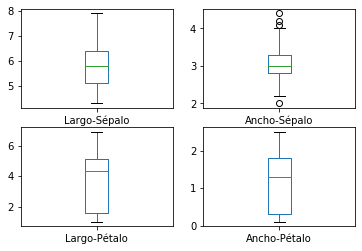

In [57]:
# PASO 4 VISUALIZACIÓN
# PASO 4.1 GRÁFICOS UNIVARIADOS
# Grafico de cajas
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

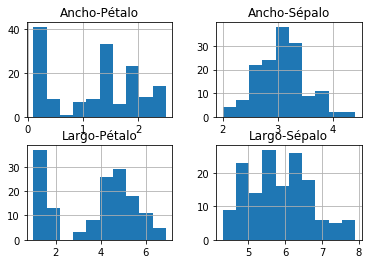

In [58]:
# histogramas, evaluar distribución
dataset.hist()
pyplot.show()


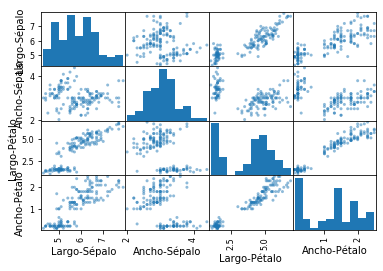

In [59]:
#PASO 4.2 GRÁFICOS MULTIVARIABLES
# MATRIZ DIAGRAMA DE DISPERSIÓN
scatter_matrix(dataset)
pyplot.show()


In [60]:
#5. Evaluar algunos algoritmos

# 5.1 Crear un conjunto de datos de validación

# Conjunto de datos de validación dividida
#con el 80% creamos el modelo y el 20% entrenamos
array = dataset.values #los datos ahora los transformo a un arreglo
X = array[:,0:4]  #tomo los datos, sin la clase de clasificación, son 4 posiciones, por eso 4
y = array[:,4] # tomo los datos despues de la posición 4, en este caso las clases.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0) #divido los datos en conjunto de entrenamiento y prueba

#X_train tiene los valores de la matriz, no así la clase con la que se va a modelar, en este caso el 80% de los datos
#X_validation tiene los valores continuos de la matriz, no así la clase con la que se va a probar en este caso el 20% de los datos
#Y_train tiene los valores de las clases, en este caso el 80% de los datos



In [71]:
#5.3 Modelos de construcción
#No sabemos qué algoritmos serían buenos para este problema o qué configuraciones usar.
#Probemos 6 algoritmos diferentes:
#Regresión logística (LR)
#Análisis discriminante lineal (LDA)
#K Vecinos más cercanos (KNN).
#Árboles de clasificación y regresión (CART).
#Gauss Bayesiana (NB).
#Máquinas de Soporte Vectorial (SVM).
#Esta es una buena mezcla de algoritmos lineales simples (LR y LDA), no lineales (KNN, CART, NB y SVM).


# Algoritmos de Comprobación, los guardamos en una lista la configuración de los modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='rbf'))) # para este kernel está: rbf, poly, sigmoide, linear


#Hay que tomar en cuenta la calibración, eso es otra historia más larga..
#Para eso investiguen GridSearchCV

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,


In [90]:
#5.4 Seleccionar el mejor modelo
#Ahora tenemos 6 modelos y estimaciones de precisión para cada uno. Necesitamos comparar los modelos entre sí y seleccionar el más preciso.
# Evaluación de cada uno de los modelos
#Usaremos validación cruzada estratificada 10 veces para estimar la precisión del modelo.
#Esto dividirá nuestro conjunto de datos en 10 partes, entrenará en 9 y probará en 1 y repetirá para todas las combinaciones de divisiones de prueba.
#Validacion Cruzada Estratificada: Toma en cuenta la información del grupo para evitar construir pliegues con distribuciones de clase desequilibradas 
#(para tareas de clasificación binarias o multiclase).


resultados = []
names = []


#Si se necesita tanto el índice o nombre, así como el elemento, se usa for indice, elemento in lista
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Declaracion de la validación cruzada, las características
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') #genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en lista
    resultados.append(cv_resultados)  #genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en matrices, esto para hacer el boxplot... 
    names.append(name) #names en matrices
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))
#Al ejecutar el codigo anterior, obtenemos los siguientes resultados sin procesar, dond el mejor modelo es Maquinas vectoriales, los valores 
#pueden variar por su naturaleza estocástica



LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


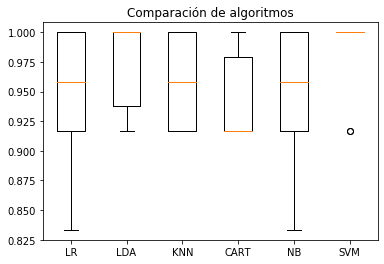

In [91]:
#Comparación de algoritmos
#podemos evaluar cada una de las 10 muestras observar la disperción del error y donde se centra 

pyplot.boxplot(resultados, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

In [64]:
# 6.1 Hacer predicciones y evaluación del dataset

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

#datadrame es una estructura para manejar datos tabulados para una mayor facilidad de su tratamiento 
mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=['Iris-setosa','Iris-versicolor','Iris-virginica']), 
                 index = ['Iris-setosa','Iris-versicolor','Iris-virginica'],  
                 columns = ['Iris-setosa','Iris-versicolor','Iris-virginica'])  
 

# 6.2 Evaluar predicciones
print("ROC:", accuracy_score(Y_test, prediccion),sep='\n')
print("")
print("Matriz de Confusión:", mc,sep='\n')

ROC:
0.9666666666666667

Matriz de Confusión:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               11                0               0
Iris-versicolor            0               12               1
Iris-virginica             0                0               6


In [25]:
#ALGORITMOS QUE PUEDEN EXPLORAR MÁS PARA INVESTIGAR
#Simple Linear Regression using Statistics.
#Simple Linear Regression with Gradient Descent.
#Logistic Regression with Gradient Descent.
#Linear Discriminant Analysis using Statistics.
#Classification and Regression Trees with Gini.
#Naive Bayes for Categorical Data.
#Gaussian Naive Bayes for Real-Valued Data.
#K-Nearest Neighbors for Classification.
#Learning Vector Quantization for Classification.
#Support Vector Machines with Gradient Descent.
#Bagged Classification and Regression Trees.
#AdaBoost for Classification.
#Redes Neuronales